In [1]:
# SQLite is already available in Colab, no installation required
import sqlite3
import pandas as pd


In [2]:
# Connect to SQLite (creates database if it doesn't exist)
conn = sqlite3.connect('network_data.db')
print("✅ Database created and connected successfully.")


✅ Database created and connected successfully.


In [3]:
# Load your dataset CSV into Pandas DataFrame
df = pd.read_csv('simulated_network_data.csv')

# Save DataFrame to SQLite database as a table named 'network_traffic'
df.to_sql('network_traffic', conn, if_exists='replace', index=False)

print("✅ CSV data loaded into SQLite database successfully.")


FileNotFoundError: [Errno 2] No such file or directory: 'simulated_network_data.csv'

In [4]:
# Load your dataset CSV into Pandas DataFrame
df = pd.read_csv('simulated_network_data.csv')

# Save DataFrame to SQLite database as a table named 'network_traffic'
df.to_sql('network_traffic', conn, if_exists='replace', index=False)

print("✅ CSV data loaded into SQLite database successfully.")


✅ CSV data loaded into SQLite database successfully.


In [5]:
# Execute a simple query to fetch data
query = "SELECT * FROM network_traffic LIMIT 5;"
df_preview = pd.read_sql(query, conn)

# Display result
df_preview


,timestamp,node_id,latency_ms,response_time_ms,throughput_MBps,status
0,2025-07-09 23:48:46.487062,101,67.561070,212.495023,7.425178,Active
1,2025-07-10 00:48:46.487062,102,59.729799,167.706615,4.075563,Active
2,2025-07-10 01:48:46.487062,101,34.488809,223.559800,7.568269,Active
3,2025-07-10 02:48:46.487062,102,51.911435,180.094835,4.693582,Active
4,2025-07-10 03:48:46.487062,102,66.047761,152.039240,6.991559,Inactive


In [7]:
import pandas as pd
import sqlite3

# Connect again to your database
conn = sqlite3.connect('network_data.db')

# Load data from SQL to Pandas DataFrame
query = "SELECT * FROM network_traffic;"
df = pd.read_sql(query, conn)

print("✅ Data loaded successfully from SQLite into Pandas.")
df.head()


✅ Data loaded successfully from SQLite into Pandas.


,timestamp,node_id,latency_ms,response_time_ms,throughput_MBps,status
0,2025-07-09 23:48:46.487062,101,67.561070,212.495023,7.425178,Active
1,2025-07-10 00:48:46.487062,102,59.729799,167.706615,4.075563,Active
2,2025-07-10 01:48:46.487062,101,34.488809,223.559800,7.568269,Active
3,2025-07-10 02:48:46.487062,102,51.911435,180.094835,4.693582,Active
4,2025-07-10 03:48:46.487062,102,66.047761,152.039240,6.991559,Inactive


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 timestamp           0
node_id             0
latency_ms          0
response_time_ms    0
throughput_MBps     0
status              0
dtype: int64


In [10]:
# Check descriptive statistics
df.describe()


,node_id,latency_ms,response_time_ms,throughput_MBps
count,168.000000,168.000000,168.000000,168.000000
mean,101.946429,49.504229,201.402021,4.851560
std,0.842430,10.523760,52.939189,1.977249
min,101.000000,19.948718,60.963115,0.500000
25%,101.000000,43.433868,165.732583,3.637003
50%,102.000000,48.947750,202.018421,4.945745
75%,103.000000,57.468298,234.166633,6.276339
max,103.000000,74.977676,348.534993,9.203759


In [12]:
# Removing extreme outliers clearly (if latency > 150 ms or response_time > 400 ms)
df_cleaned = df[(df['latency_ms'] <= 150) & (df['response_time_ms'] <= 400)]

print(f"Rows before cleaning: {len(df)}, Rows after cleaning: {len(df_cleaned)}")


Rows before cleaning: 168, Rows after cleaning: 168


In [13]:
# Convert timestamp to datetime
df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])

# Extract additional time features clearly
df_cleaned['date'] = df_cleaned['timestamp'].dt.date
df_cleaned['hour'] = df_cleaned['timestamp'].dt.hour

df_cleaned.head()


,timestamp,node_id,latency_ms,response_time_ms,throughput_MBps,status,date,hour
0,2025-07-09 23:48:46.487062,101,67.561070,212.495023,7.425178,Active,2025-07-09,23
1,2025-07-10 00:48:46.487062,102,59.729799,167.706615,4.075563,Active,2025-07-10,0
2,2025-07-10 01:48:46.487062,101,34.488809,223.559800,7.568269,Active,2025-07-10,1
3,2025-07-10 02:48:46.487062,102,51.911435,180.094835,4.693582,Active,2025-07-10,2
4,2025-07-10 03:48:46.487062,102,66.047761,152.039240,6.991559,Inactive,2025-07-10,3


In [14]:
# Save cleaned data into a new table
df_cleaned.to_sql('cleaned_network_traffic', conn, if_exists='replace', index=False)

print("✅ Cleaned data successfully saved back to SQLite database.")


✅ Cleaned data successfully saved back to SQLite database.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set a clean visual style for all Seaborn plots
sns.set(style="whitegrid")


/tmp/ipython-input-16-4228703149.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust layout to prevent label cutting
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


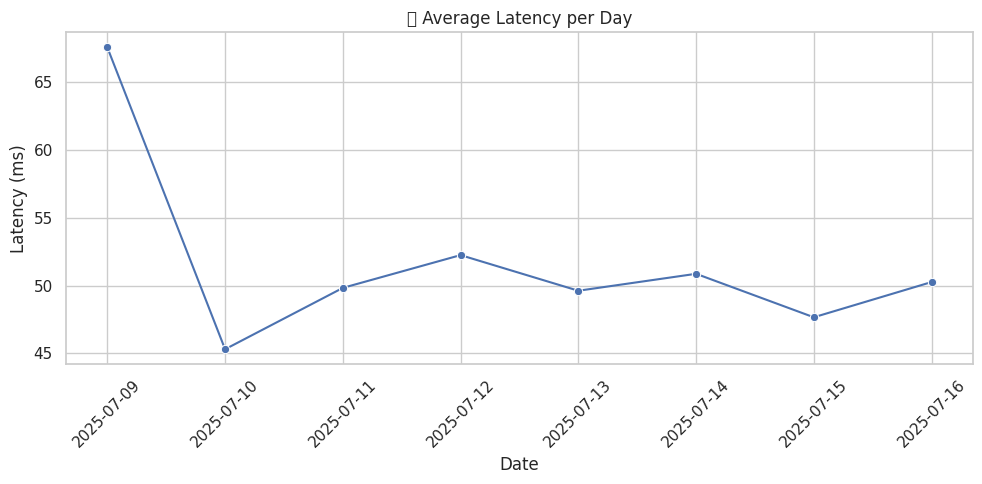

In [16]:
# Group by date and calculate mean latency
daily_latency = df_cleaned.groupby('date')['latency_ms'].mean().reset_index()

# Plot the result
plt.figure(figsize=(10, 5))  # Set chart size
sns.lineplot(x='date', y='latency_ms', data=daily_latency, marker='o')
plt.title("📈 Average Latency per Day")  # Chart title
plt.xlabel("Date")  # X-axis label
plt.ylabel("Latency (ms)")  # Y-axis label
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout to prevent label cutting
plt.show()


/tmp/ipython-input-17-4206316644.py:11: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


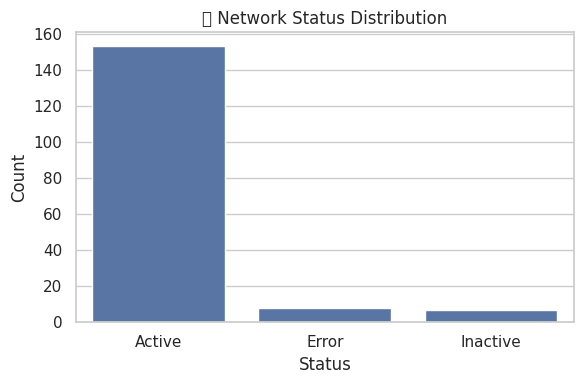

In [17]:
# Count how many times each status occurred
status_counts = df_cleaned['status'].value_counts().reset_index()
status_counts.columns = ['status', 'count']

# Plot the status counts
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='count', data=status_counts)
plt.title("🛠️ Network Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


/tmp/ipython-input-18-1465704232.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


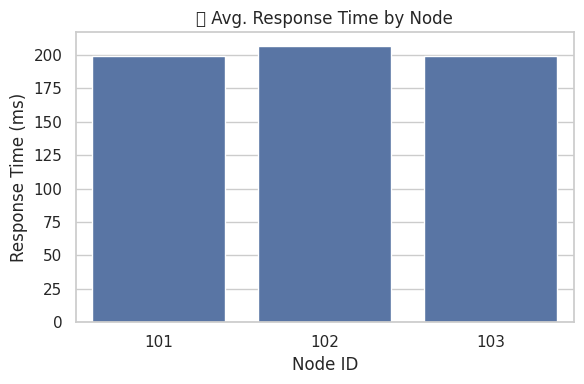

In [18]:
# Group by node and calculate average response time
node_response = df_cleaned.groupby('node_id')['response_time_ms'].mean().reset_index()

# Plot average response time for each node
plt.figure(figsize=(6, 4))
sns.barplot(x='node_id', y='response_time_ms', data=node_response)
plt.title("📊 Avg. Response Time by Node")
plt.xlabel("Node ID")
plt.ylabel("Response Time (ms)")
plt.tight_layout()
plt.show()
